# Findings:
In this section we have looked into the accidents dataset to investigate if there is any correlation between accident occurrences and weather conditions. The findings showed that 69% of accidents occurred on dry road conditions with no rain or snow. Surprisingly, 80% of accidents happened in fine weather with no high wind speed, rain or snow, whilst only around 12% of accidents happened in rainy weather. The dataset also shows that road conditions were reported to be damp or wet when 27% of accidents occurred, which would indicate that accidents occurred not long after rain or snow fall.


# Main conclusions:
* Accidents mainly occurred in good weather conditions. This could be related to the fact that drivers are more attentive when driving in bad weather conditions and tend to be more relaxed in fine weather conditions.
* Around 27% of accidents are reported to have happened on wet or damp roads but during no rain or snow. This could mean the roads were still slippery and could influence the accident occurrences when drivers were making various maneuvers. 
* There are no particular months with higher number of accident occurrences. The number of accidents are evenly distributed throughout the year.

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#load main csv files
main_df = pd.read_csv("../all.csv", encoding='windows-1254', low_memory=False)
#main1_df = pd.read_csv("../time_bin.csv", encoding='windows-1254', low_memory=False)

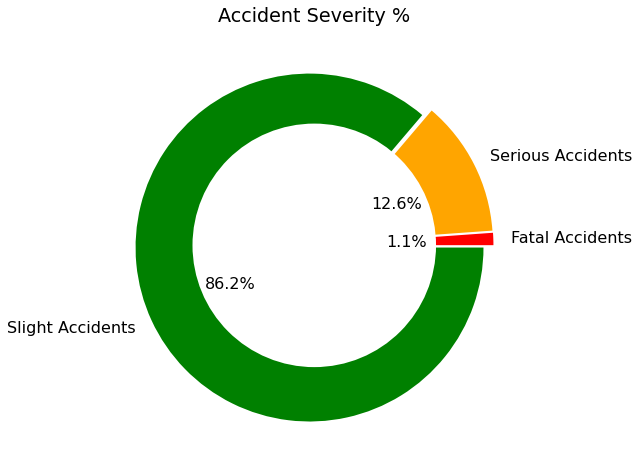

In [142]:
"""This section shows the accident severity levels in percentage"""
#count values by accident severity
fatal_accidents = main_df['Accident_Severity'].value_counts()['Fatal']
serious_accidents = main_df['Accident_Severity'].value_counts()['Serious']
slight_accidents = main_df['Accident_Severity'].value_counts()['Slight']

#create names for pie chart
acc_names = ['Fatal Accidents','Serious Accidents','Slight Accidents']
my_data = [fatal_accidents, serious_accidents, slight_accidents]

#create pie chart in circle
explode = [0.03,0.03,0.03]
plt.figure(figsize=(8,6))
plt.pie(my_data,labels=acc_names,colors=['red', 'orange', 'green'],autopct='%1.1f%%',pctdistance=0.50, explode=explode)
plt.rcParams['font.size'] = 16
circle = plt.Circle((0,0),0.7,fc='white')
chart = plt.gcf()
chart.set_size_inches(8,8)
chart.gca().add_artist(circle)
plt.title('Accident Severity %')
plt.show()

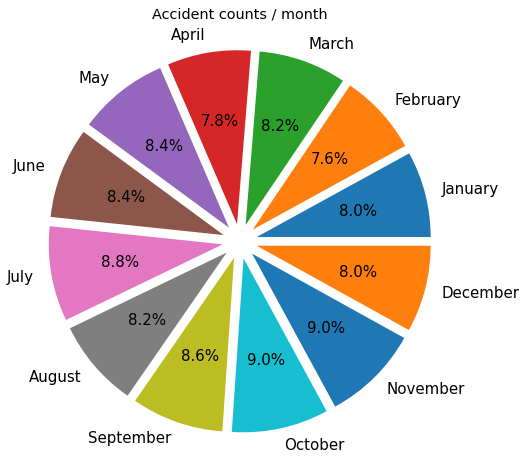

In [125]:
"""In this section we are checking the accident occurrences by month. The data suggests there is no significant difference
in number of accidents by months"""

#change date column into datetime format
main_df['Date'] = pd.to_datetime(main_df['Date'],format='%Y-%m-%d')
#extract only month as a new column
main_df['month'] = main_df['Date'].dt.month

#groupby month column and count number of accidents
month = main_df.groupby('month')['Accident_Index'].nunique()
month_df = pd.DataFrame({"Accident count": month}).reset_index()

#create new column called Percentage
month_df['Percentage'] = ""

#calculate the percentage
percentage = month_df['Accident count']/month_df['Accident count'].sum()*100
month_df['Percentage']=round(percentage,2)

#create pie chart
plt.figure(figsize=(10,8))
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
months = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December']
my_data = month_df['Percentage'].tolist()
plt.pie(my_data,labels=months,autopct='%1.1f%%', explode=explode)
plt.rcParams['font.size'] = 12
plt.title('Accident counts / month')
plt.show()

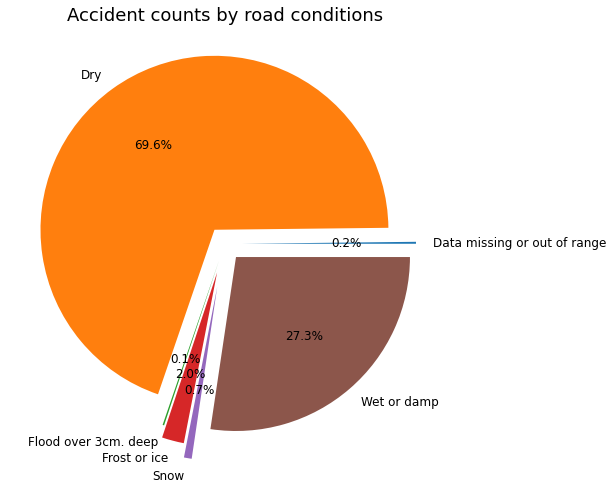

In [4]:
"""In this section we are attempting to understand what the road conditions were during accidents. It turns out that majority
of accidents happened in dry road conditions"""

#groupby road surface conditions column and count number of accidents
road = main_df.groupby('Road_Surface_Conditions')['Accident_Index'].nunique()
#create new df with new column 'Accident count' and assign number of unique values calc-d above
road_df = pd.DataFrame({"Accident count": road}).reset_index()
#create new column for percentage
road_df['Percentage'] = ""

#calculate percentage
percentage = road_df['Accident count']/road_df['Accident count'].sum()*100
road_df['Percentage']=round(percentage,2)

#create pie chart
plt.figure(figsize=(10,8))
explode = [0.1,0.1,0.1,0.17,0.25,0.1]

my_data = road_df['Percentage'].tolist()
my_labels = road_df['Road_Surface_Conditions'].tolist()

plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', explode=explode)
plt.rcParams['font.size'] = 15
plt.title('Accident counts by road conditions')
plt.show()

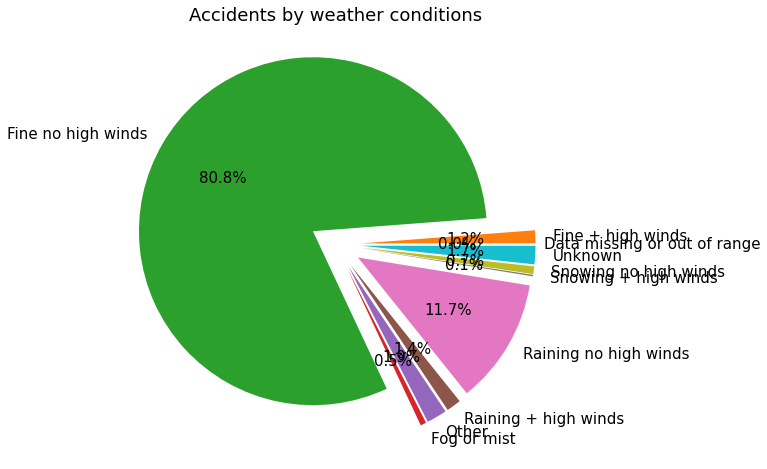

In [5]:
"""In this section we are analysing if bad weather conditions are the main cause of accidents. In fact, the dataset suggests
the greatest number of accidents occurred in fine weather conditions"""

#groupby weather conditions column and count number of accidents
accident_count_weather = main_df.groupby('Weather_Conditions')['Accident_Index'].nunique()
#create new df
accident_count_weather_df = pd.DataFrame({"Accident count": accident_count_weather}).reset_index()
#create new column for percentage
accident_count_weather_df['Percentage'] = ""

#calculate the percentage
percentage = accident_count_weather_df['Accident count']/accident_count_weather_df['Accident count'].sum()*100
accident_count_weather_df['Percentage']=round(percentage,2)

#create the pie chart
plt.figure(figsize=(10,8))
explode = [0.1,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15]
my_data = accident_count_weather_df['Percentage'].tolist()
my_labels = accident_count_weather_df['Weather_Conditions'].tolist()
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', explode=explode)
plt.title('Accidents by weather conditions')
plt.rcParams['font.size'] = 12
plt.show()

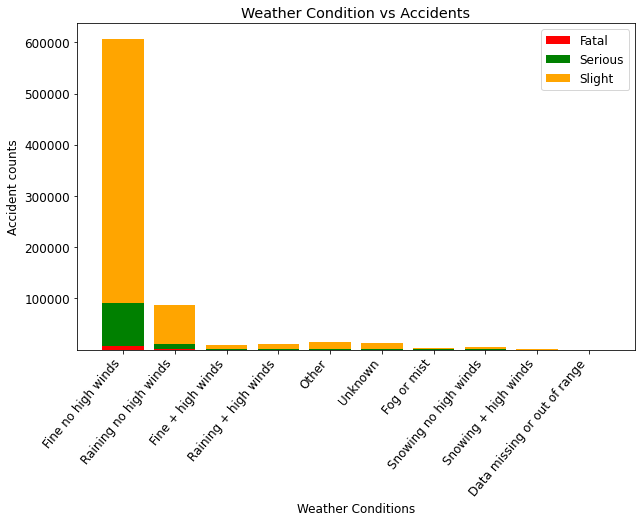

In [6]:
"""In this section we are building a stacked bar chart to check number of accidents including sub categories
(fatal, serious, slight) versus weather conditions. The findings show accidents mainly happened in fine weather conditions"""

#create new df and groupby 2 columns
accident_sev_df = main_df.groupby(['Weather_Conditions','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
#sort the df
sorted_df=accident_sev_df.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

#create 3 bars for the stacked bar chart
bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

#r for x axis
r = sorted_df['Weather_Conditions']

#sum bar1 and bar2 as required for stacked bar chart in matplotlib
sum12 = bar1+bar2

#create bar chart
plt.figure(figsize=(10,6))
plt.title('Weather Condition vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Weather Conditions")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='green', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='orange',label='Slight')
plt.legend(loc="upper right")
plt.show()